In [ ]:
#primeiramente as bibliotecas de exportação + cálculo
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
#depois importar as dependências para a criação do modelo
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#e importar dependencias para avaliar o modelo
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
#importar

In [ ]:
# para melhor organização e claridade dos dados, criaremos uma variável para o path
dados_path = "C:/Users/IP/Documents/PROGRAMAÇÃO PYTHON/DATA PROJECTS/Credit Card Fraud (Classification ML Model)/CREDIT CARD FRAUD DATASET.csv"

#ai leremos o csv com a função do pandas
dados_cartao = pd.read_csv(dados_path)

dados_cartao.shape

(284807, 32)

In [ ]:
#primeiramente, veremos as 5 primeiras e 5 últimas linhas do dataset para avaliar

#dados_cartao.head()
dados_cartao.tail()


#as variáveis mais claras que temos são: time (tempo), amount (valor gasto) 
#e class(sendo 0 não fraudulento e 1 fraudulento)
#até então tanto no head quanto no tail apenas temos transação não fraudulentas

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,284803,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,284804,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,284805,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,284806,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,284807,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [ ]:
#vamos avaliar se o dataset tem valores faltantes

dados_cartao.isnull().sum()

#ufa! um dataset tecnicamente sem nenhum valor faltante

Unnamed: 0    0
Time          0
V1            0
V2            0
V3            0
V4            0
V5            0
V6            0
V7            0
V8            0
V9            0
V10           0
V11           0
V12           0
V13           0
V14           0
V15           0
V16           0
V17           0
V18           0
V19           0
V20           0
V21           0
V22           0
V23           0
V24           0
V25           0
V26           0
V27           0
V28           0
Amount        0
Class         0
dtype: int64

In [ ]:
#prosseguiremos agora em criar variávels para analisar/visualizar

fraude = dados_cartao.loc[dados_cartao['Class'] == 1] #ou seja, 1 é fraude

seguro = dados_cartao.loc[dados_cartao['Class'] == 0] #ou seja, 0 é ok



In [ ]:
#para contarmos a quantidade de vezes que temos fraude, usaremos
# a função len()

len(fraude) #poucas, contra a quantidade total de linhas (284807)

492

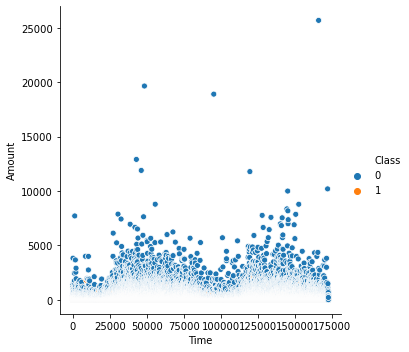

In [ ]:
#podemos usar o relation plot do sns para analisarmos as
#relações entre nossas variáveis de interesse

vis_1 = sns.relplot(x = 'Time', y = 'Amount', hue = 'Class', data = dados_cartao)

vis_1

#infelizmente, como a quantidade de frauds é pequena, é dificil visualizar
#especialmente dada a densidade e concentração dos valores

In [ ]:
#iremos começar a mexer com alguns tipos diferentes de modelo
#para começar: usaremos o já importado linear_model
X = dados_cartao.iloc[:, :-1] #usaremos tudo menos o target como feature 
y = dados_cartao.loc[:, 'Class'] #nosso target é se é fraude ou não



In [ ]:
#como tivemos um aviso na primeira vez que tentamos fitar o modelo
#iremos utilizar o standartscaler para evitar problemas

sc = StandardScaler()

sc_x = sc.fit(X)

X = sc_x.transform(X)

#passaremos o train_test_split para separar parte para validação
#separaremos por 70/30

X_treino, X_val, y_treino, y_val = train_test_split(X, y, test_size = 0.35)

In [ ]:
#hora de criar o modelo + ajustar

modelo1 = LogisticRegression(C=1e5) #colocamos C como parametro para otimizar  

modelo1.fit(X_treino, y_treino)

C:\Users\IP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=100000.0)

In [ ]:
#vamos criar a previsão do modelo e transformar em arrays do numpy

y_prev = np.array(modelo1.predict(X_val))

y_val_a = np.array(y_val) #também transformaremos o y validador em array

In [ ]:
#hora de fazer as avaliações, começando com a acurácia

acc = accuracy_score(y_val_a, y_prev)

print(acc)

0.9991773923336978


In [ ]:
#então agora avaliaremos com a matrix de confusão

mat_conf = confusion_matrix(y_val_a, y_prev)

print(mat_conf)

[[99486    19]
 [   63   115]]


In [ ]:
#a última avaliação será feita usando o classification report

clas_rep = classification_report(y_val_a, y_prev)

print(clas_rep)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     99505
           1       0.86      0.65      0.74       178

    accuracy                           1.00     99683
   macro avg       0.93      0.82      0.87     99683
weighted avg       1.00      1.00      1.00     99683



In [ ]:
#no final, o modelo teve avaliações boas dado o uso de
#padronização, porém irei investigar em breve outros
#algoritmos